In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
migration_df = pd.read_csv("migration-crude-rate-fixed2.csv")
migration_df.head()

,country_name,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Austria,13.2,7.5,5.1,4.0,4.6,4.4,5.8,15.1,7.2,:
1,Belgium,5.5,2.4,3.2,4.3,5.0,3.9,4.9,10.9,7.6,:
2,Bulgaria,-6.7,-6.8,-6.8,-7.0,-7.3,4.3,6.3,4.2,6.4,:
3,Croatia,-8.0,-9.3,-11.7,-7.5,-4.9,-4.9,-1.2,3.0,7.8,:
4,Cyprus,-2.4,2.9,7.2,9.3,10.0,5.0,6.2,14.3,9.9,:


In [4]:
votes_df = pd.read_csv("party-vote-shares.csv")
votes_df.head()


,country_name,party_name,prev_year,prev_vote,last_year,last_vote
0,Austria,FP�,2019,16.2,2024,28.8
1,Belgium,VB,2019,12.0,2024,14.4
2,Bulgaria,REVIVAL,2023,14.1,2024,13.7
3,Croatia,LAJ c.,2020,9.5,2024,9.5
4,Cyprus,ELAM,2016,3.7,2021,6.8


### Descriptive Statistics

In [5]:
votes_df[['prev_vote', 'last_vote']].describe()

,prev_vote,last_vote
count,27.000000,27.000000
mean,15.548148,18.455556
std,11.642276,11.079341
min,3.200000,1.500000
25%,8.350000,9.400000
50%,11.100000,18.100000
75%,18.250000,24.750000
max,43.700000,41.700000


# Explotarory Data Analysis

### Creating Histograms of Immıgration Rates and Vote Shares
To see how data is distributed

In [6]:
migration_long = migration_df.melt(id_vars='country_name', var_name='year', value_name='immigration_rate')
migration_long['year'] = pd.to_numeric(migration_long['year'], errors='coerce')
migration_long['immigration_rate'] = pd.to_numeric(migration_long['immigration_rate'], errors='coerce')


In [7]:
votes_df['prev_vote'] = pd.to_numeric(votes_df['prev_vote'], errors='coerce')
votes_df['last_vote'] = pd.to_numeric(votes_df['last_vote'], errors='coerce')
votes_df['vote_change'] = votes_df['last_vote'] - votes_df['prev_vote']


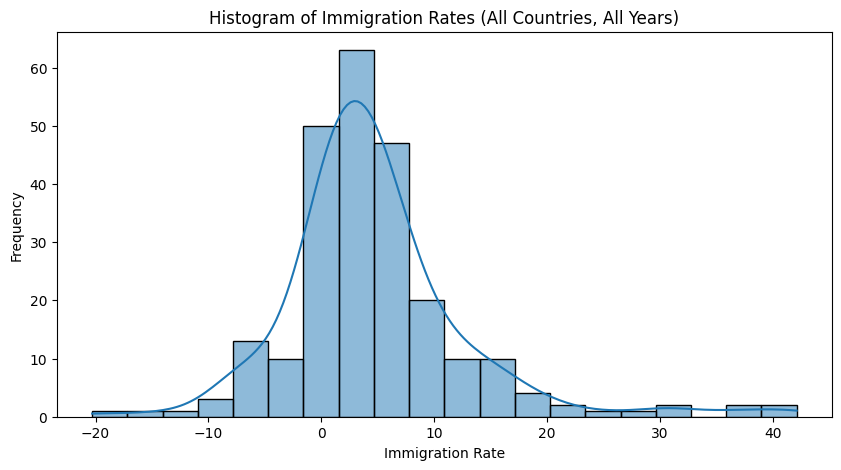

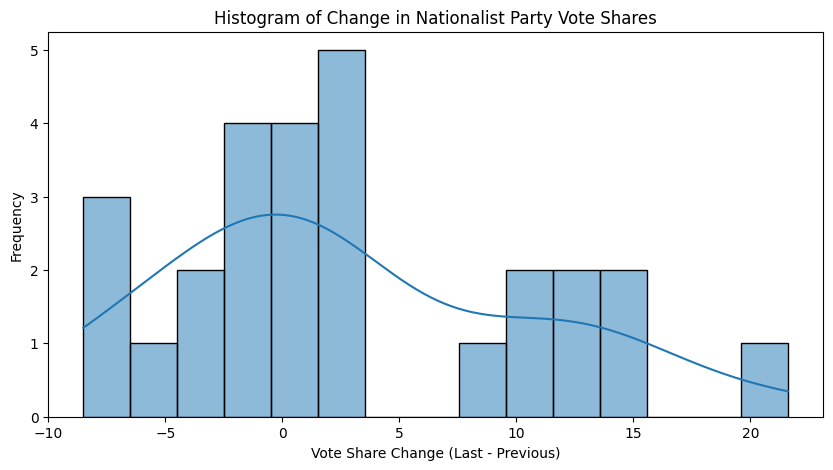

In [8]:
# Histogram for immigration rate
plt.figure(figsize=(10, 5))
sns.histplot(migration_long['immigration_rate'].dropna(), bins=20, kde=True)
plt.title('Histogram of Immigration Rates (All Countries, All Years)')
plt.xlabel('Immigration Rate')
plt.ylabel('Frequency')
plt.show()

# Histogram for vote share change
plt.figure(figsize=(10, 5))
sns.histplot(votes_df['vote_change'].dropna(), bins=15, kde=True)
plt.title('Histogram of Change in Nationalist Party Vote Shares')
plt.xlabel('Vote Share Change (Last - Previous)')
plt.ylabel('Frequency')
plt.show()


### Creating Time Series of Immıgration Rates and Vote Shares
To visually show trends over time

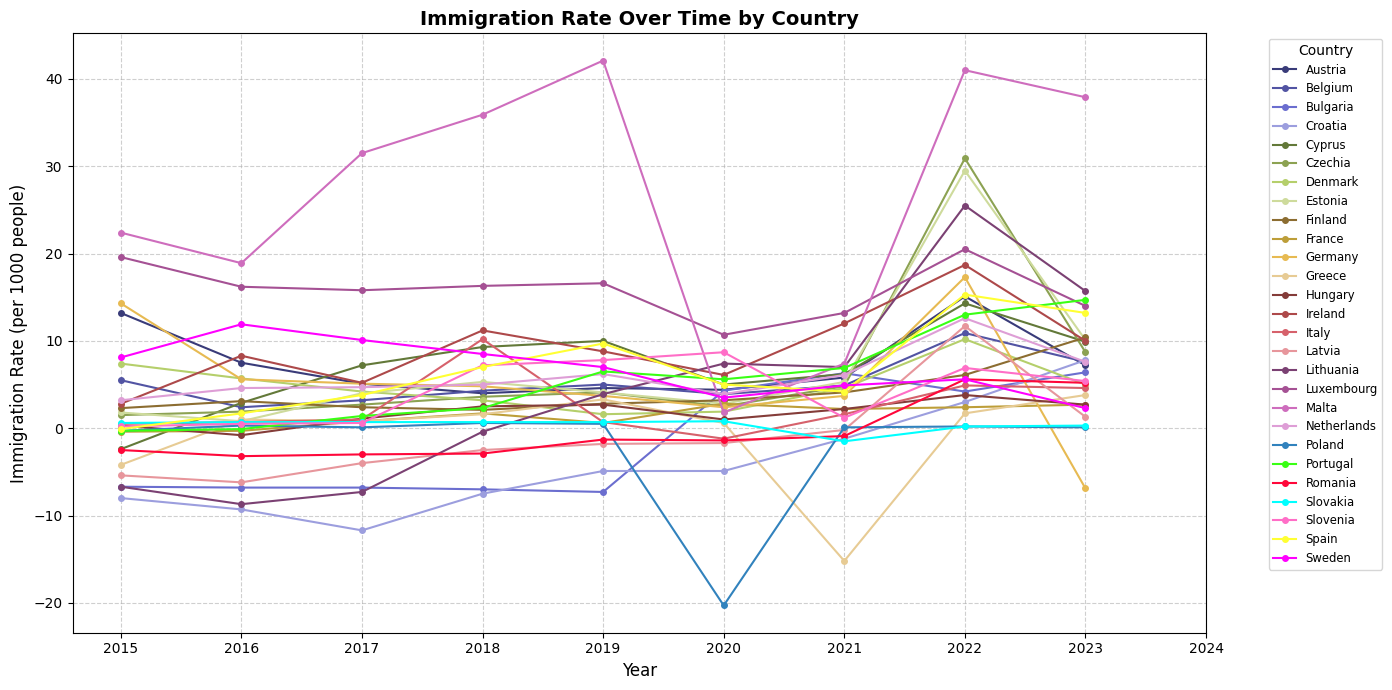

In [20]:
neon_colors = [
    '#39FF14',  # Neon Green
    '#FF073A',  # Neon Red
    '#00FFFF',  # Neon Cyan
    '#FF6EC7',  # Neon Pink
    '#FFFF33',  # Neon Yellow
    '#FF00FF',  # Fuchsia
]
blended_colors = combined_palette[:len(countries) - len(neon_colors)] + neon_colors
blended_colors = blended_colors[:len(countries)] 
plt.figure(figsize=(14, 7))
for i, country in enumerate(countries):
    subset = migration_long[migration_long['country_name'] == country]
    plt.plot(subset['year'], subset['immigration_rate'],
             label=country,
             marker='o',
             markersize=4,
             color=blended_colors[i],
             linewidth=1.5)
plt.title("Immigration Rate Over Time by Country", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Immigration Rate (per 1000 people)", fontsize=12)
plt.xticks(ticks=sorted(migration_long['year'].dropna().unique()))
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


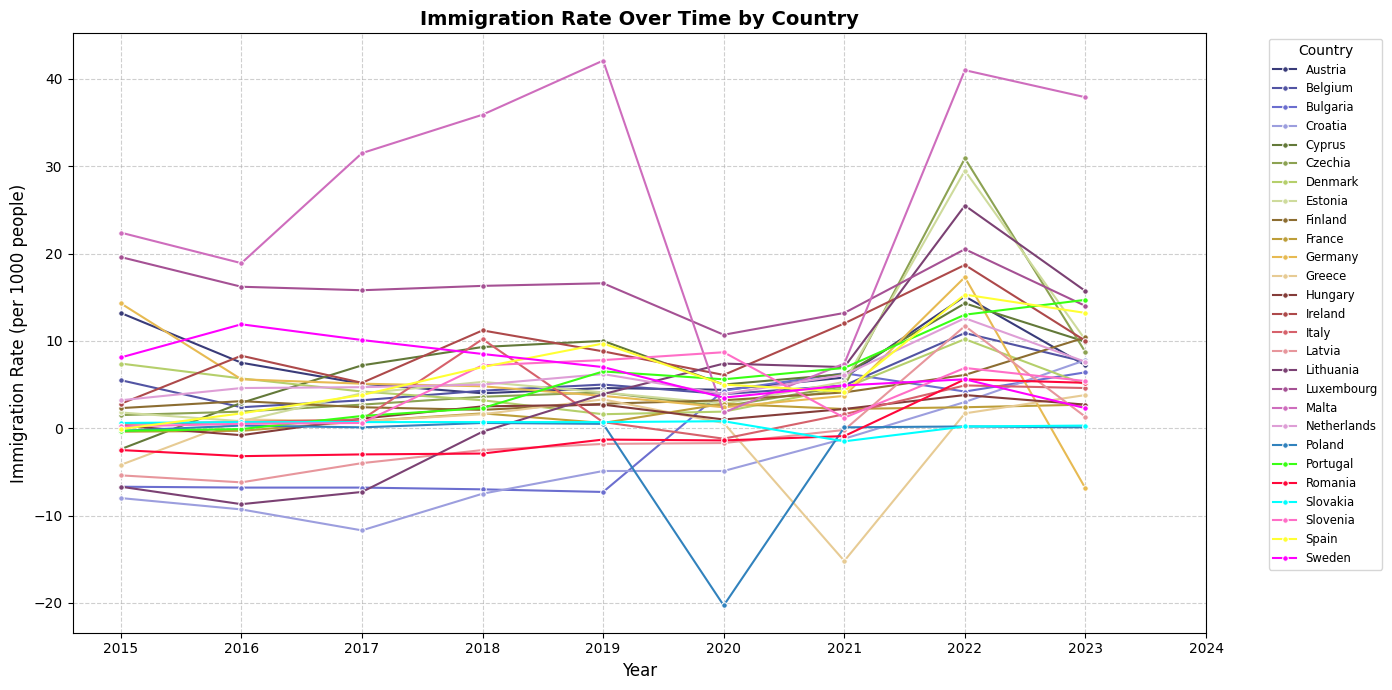

In [38]:
plt.figure(figsize=(14, 7))
color_dict = {country: blended_colors[i] for i, country in enumerate(countries)}
for country in countries:
    subset = migration_long[migration_long['country_name'] == country]
    sns.lineplot(
        data=subset,
        x='year',
        y='immigration_rate',
        label=country,
        marker='o',
        markersize=4,
        linewidth=1.5,
        color=color_dict[country]
    )
plt.title("Immigration Rate Over Time by Country", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Immigration Rate (per 1000 people)", fontsize=12)
plt.xticks(ticks=sorted(migration_long['year'].dropna().unique()))
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [24]:
votes_prev = votes_df[['country_name', 'prev_year', 'prev_vote']].rename(columns={'prev_year': 'year', 'prev_vote': 'vote_share'})
votes_last = votes_df[['country_name', 'last_year', 'last_vote']].rename(columns={'last_year': 'year', 'last_vote': 'vote_share'})

votes_long = pd.concat([votes_prev, votes_last])
votes_long['year'] = pd.to_numeric(votes_long['year'], errors='coerce')
votes_long['vote_share'] = pd.to_numeric(votes_long['vote_share'], errors='coerce')


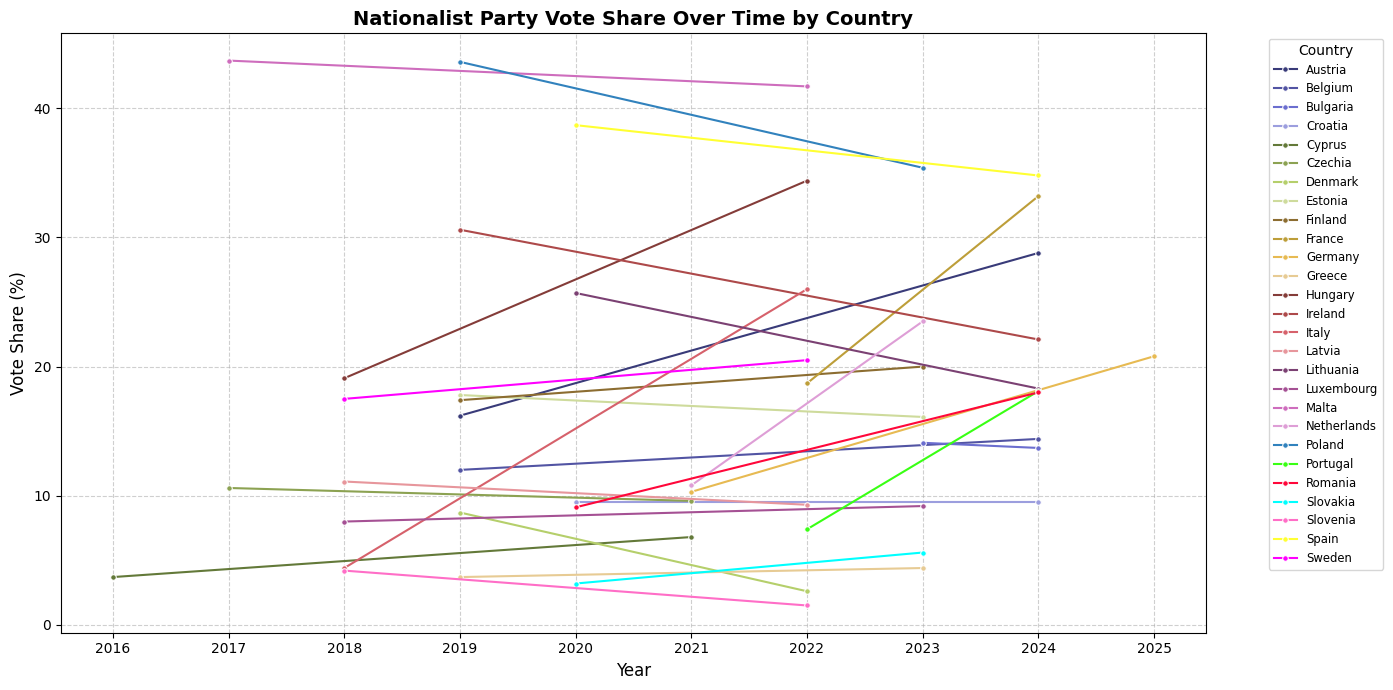

In [ ]:
votes_long = votes_long.reset_index(drop=True)
plt.figure(figsize=(14, 7))
for country in countries:
    subset = votes_long[votes_long['country_name'] == country]
    sns.lineplot(
        data=subset,
        x='year',
        y='vote_share',
        label=country,
        marker='o',
        markersize=4,
        linewidth=1.5,
        color=color_dict[country]
    )
plt.title("Nationalist Party Vote Share Over Time by Country", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Vote Share (%)", fontsize=12)
plt.xticks(ticks=sorted(votes_long['year'].dropna().unique()))
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Creating a Scatterplot where each point represents a country
Looking up for relationships between variables

X-axis: Trend in immigration (average change per year)

Y-axis: Change in nationalist party vote share between elections

In [27]:
immigration_trends = (
    migration_long.sort_values(['country_name', 'year'])
    .groupby('country_name')['immigration_rate']
    .apply(lambda x: x.diff().mean())  # avg yearly change
    .reset_index()
    .rename(columns={'immigration_rate': 'immigration_trend'})
)


In [28]:
votes_df['vote_change'] = votes_df['last_vote'] - votes_df['prev_vote']
vote_change = votes_df[['country_name', 'vote_change']]


In [29]:
trend_df = pd.merge(immigration_trends, vote_change, on='country_name')


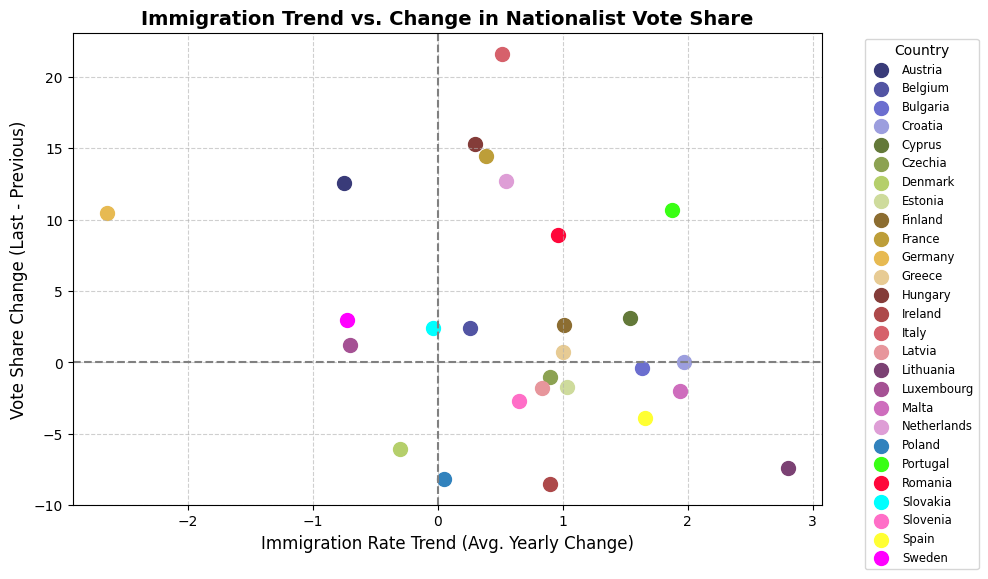

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for _, row in trend_df.iterrows():
    plt.scatter(
        row['immigration_trend'],        
        row['vote_change'],               
        label=row['country_name'],
        color=color_dict.get(row['country_name'], 'gray'),  
        s=100,
        marker='o' 
    )
plt.title('Immigration Trend vs. Change in Nationalist Vote Share', fontsize=14, fontweight='bold')
plt.xlabel('Immigration Rate Trend (Avg. Yearly Change)', fontsize=12)
plt.ylabel('Vote Share Change (Last - Previous)', fontsize=12)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()


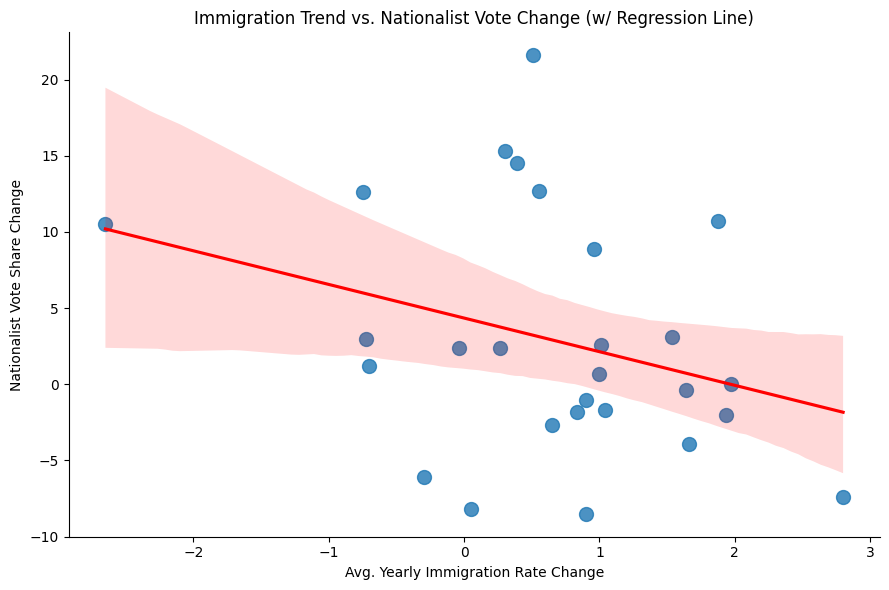

In [ ]:
sns.lmplot(
    data=trend_df,
    x='immigration_trend',
    y='vote_change',
    height=6,
    aspect=1.5,
    scatter_kws={'s': 100},
    line_kws={'color': 'red'}
)
plt.title('Immigration Trend vs. Nationalist Vote Change (w/ Regression Line)')
plt.xlabel('Avg. Yearly Immigration Rate Change')
plt.ylabel('Nationalist Vote Share Change')
plt.tight_layout()
plt.show()


### Barplot

Country-wise immigration trend and vote change

C:\Users\zeyne\AppData\Local\Temp\ipykernel_29272\2447141017.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(trend_sorted['country_name'], rotation=45, ha='right')


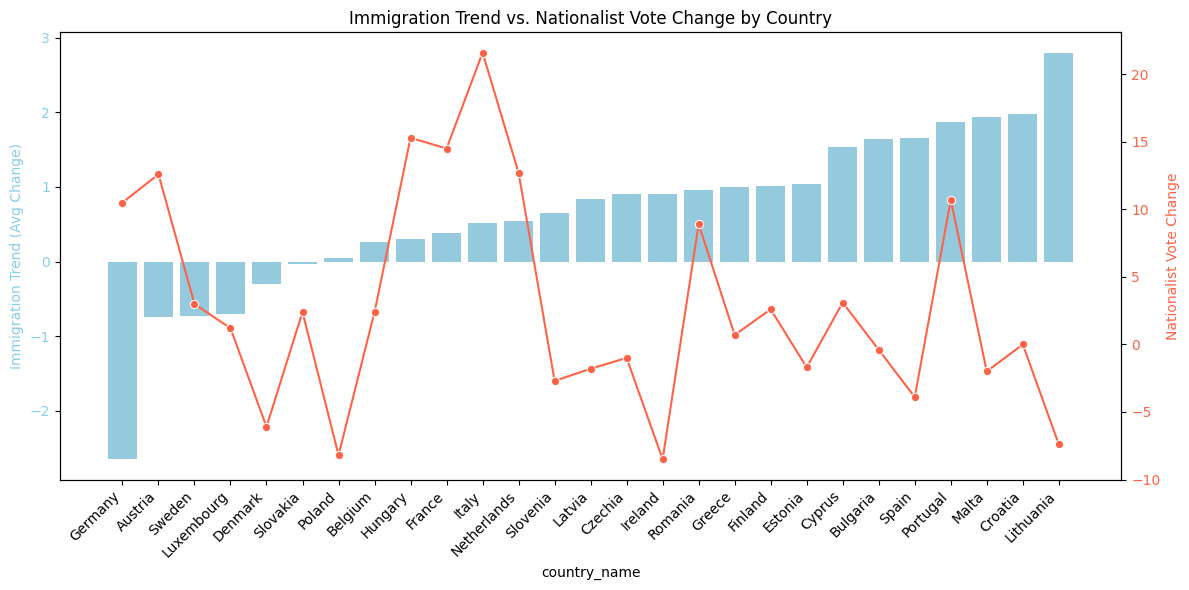

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))
trend_sorted = trend_df.sort_values('immigration_trend')
sns.barplot(x='country_name', y='immigration_trend', data=trend_sorted, color='skyblue', ax=ax1)
ax1.set_ylabel('Immigration Trend (Avg Change)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(trend_sorted['country_name'], rotation=45, ha='right')
ax2 = ax1.twinx()
sns.lineplot(x='country_name', y='vote_change', data=trend_sorted, color='tomato', marker='o', ax=ax2)
ax2.set_ylabel('Nationalist Vote Change', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')
plt.title('Immigration Trend vs. Nationalist Vote Change by Country')
plt.tight_layout()
plt.show()


# Hypothesis Testing 

### Pearson Correlation Test

In [ ]:
from scipy.stats import pearsonr

x = trend_df['immigration_trend']
y = trend_df['vote_change']
correlation, p_value = pearsonr(x, y)
print(f"Pearson Correlation: {correlation:.3f}")
print(f"P-value: {p_value:.4f}")


Pearson Correlation: -0.310
P-value: 0.1162


interpretation: 

If p-value < 0.05 → reject H₀

0.1162 = p-value ≥ 0.05 → fail to reject H₀ 

There is insufficient evidence to say increase in nationalism is about increasing immigration.


### Linear Regression Test

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            vote_change   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.649
Date:                Thu, 24 Apr 2025   Prob (F-statistic):              0.116
Time:                        17:29:32   Log-Likelihood:                -92.148
No. Observations:                  27   AIC:                             188.3
Df Residuals:                      25   BIC:                             190.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.3487      1.71

interpretation:

If coefficient of immigration_trend is positive, increasing immigration is linked with increasing nationalism.

immigration_trend's coefficient is -2.2079. There is no significant relationship.

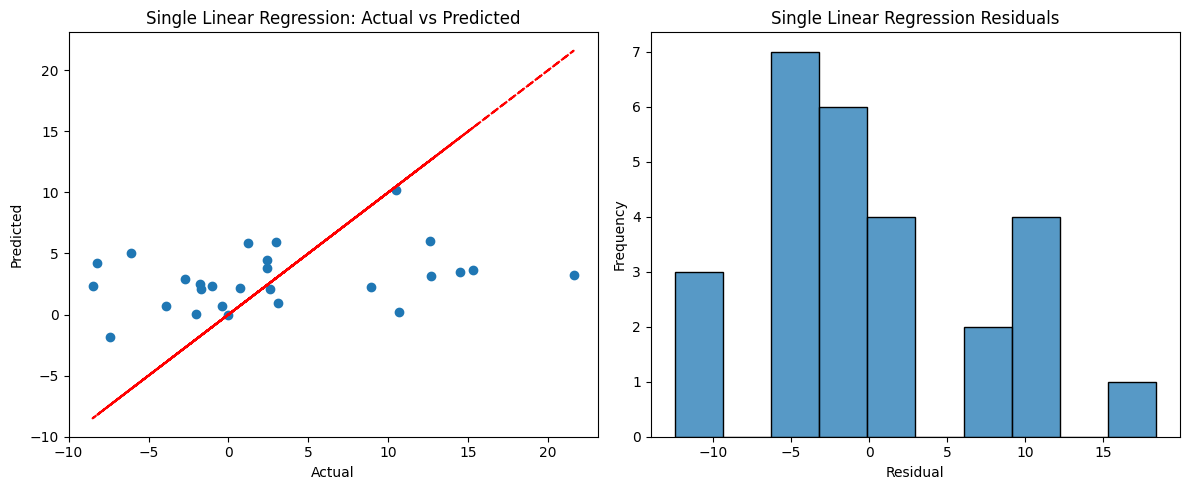

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_single = trend_df[['immigration_trend']]
y = trend_df['vote_change']

model_single = LinearRegression()
model_single.fit(X_single, y)
y_pred_single = model_single.predict(X_single)
residuals_single = y - y_pred_single
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(y, y_pred_single)
axs[0].plot(y, y, color='red', linestyle='--')
axs[0].set_title("Single Linear Regression: Actual vs Predicted")
axs[0].set_xlabel("Actual")
axs[0].set_ylabel("Predicted")

sns.histplot(residuals_single, bins=10, kde=False, ax=axs[1])
axs[1].set_title("Single Linear Regression Residuals")
axs[1].set_xlabel("Residual")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


### Multiple Linear Regression Test

Dependent Variable:
- Party vote shares

Explanatory variable:
- Migration crude rates

Control variables:
- Annual unemployment rates

- GDP per capita

In [ ]:
migration_df = pd.read_csv("migration-crude-rate-fixed2.csv")

migration_trend = (
    migration_df.melt(id_vars='country_name', var_name='year', value_name='immigration_rate')
    .assign(
        year=lambda df: pd.to_numeric(df['year'], errors='coerce'),
        immigration_rate=lambda df: pd.to_numeric(df['immigration_rate'], errors='coerce')
    )
    .sort_values(['country_name', 'year'])
    .groupby('country_name')['immigration_rate']
    .apply(lambda x: x.diff().mean())
    .reset_index(name='immigration_trend')
)


In [ ]:
gdp_df = pd.read_csv("gdp-per-capita.csv").rename(columns={'country': 'country_name'})
unemp_df = pd.read_csv("unemployment-rate.csv").rename(columns={'country': 'country_name'})

def calculate_trend(df, value_column):
    df_long = df.melt(id_vars='country_name', var_name='year', value_name=value_column)
    df_long['year'] = pd.to_numeric(df_long['year'], errors='coerce')
    df_long[value_column] = pd.to_numeric(df_long[value_column], errors='coerce')
    return (
        df_long.sort_values(['country_name', 'year'])
               .groupby('country_name')[value_column]
               .apply(lambda x: x.diff().mean())
               .reset_index(name=value_column + '_trend')
    )

gdp_trend = calculate_trend(gdp_df, 'gdp_per_capita')
unemp_trend = calculate_trend(unemp_df, 'unemployment_rate')

trend_df = migration_trend.merge(gdp_trend, on='country_name') \
                          .merge(unemp_trend, on='country_name') \
                          .merge(vote_change, on='country_name')

import statsmodels.api as sm
X = trend_df[['immigration_trend', 'gdp_per_capita_trend', 'unemployment_rate_trend']]
X = sm.add_constant(X)
y = trend_df['vote_change']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            vote_change   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     1.984
Date:                Fri, 30 May 2025   Prob (F-statistic):              0.145
Time:                        01:03:41   Log-Likelihood:                -90.401
No. Observations:                  27   AIC:                             188.8
Df Residuals:                      23   BIC:                             194.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

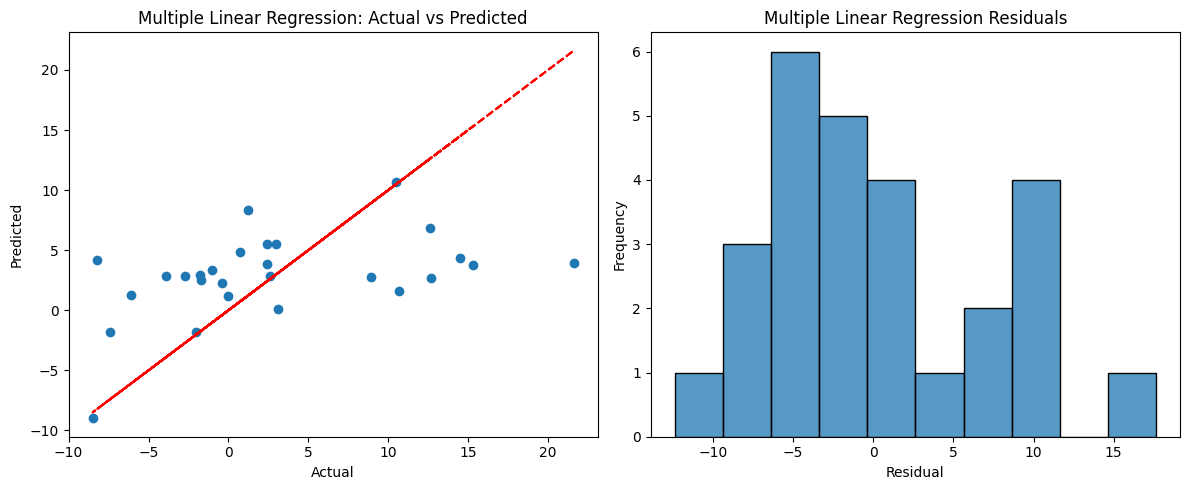

In [ ]:
X_multi = trend_df[['immigration_trend', 'gdp_per_capita_trend', 'unemployment_rate_trend']]
y = trend_df['vote_change']

model_multi = LinearRegression()
model_multi.fit(X_multi, y)
y_pred_multi = model_multi.predict(X_multi)
residuals_multi = y - y_pred_multi

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(y, y_pred_multi)
axs[0].plot(y, y, color='red', linestyle='--')
axs[0].set_title("Multiple Linear Regression: Actual vs Predicted")
axs[0].set_xlabel("Actual")
axs[0].set_ylabel("Predicted")

sns.histplot(residuals_multi, bins=10, kde=False, ax=axs[1])
axs[1].set_title("Multiple Linear Regression Residuals")
axs[1].set_xlabel("Residual")
axs[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


# Machine Learning Applications
### Lasso and Ridge Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV

X = trend_df[['immigration_trend', 'gdp_per_capita_trend', 'unemployment_rate_trend']]
y = trend_df['vote_change']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

ridge = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
ridge.fit(X_scaled, y)

lasso = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5, max_iter=10000)
lasso.fit(X_scaled, y)

print("=== Ridge Regression ===")
print(f"Best alpha: {ridge.alpha_}")
print(f"R^2 Score: {ridge.score(X_scaled, y):.4f}")
print("Coefficients:")
for name, coef in zip(X.columns, ridge.coef_):
    print(f"{name}: {coef:.4f}")

print("\n=== Lasso Regression ===")
print(f"Best alpha: {lasso.alpha_}")
print(f"R^2 Score: {lasso.score(X_scaled, y):.4f}")
print("Coefficients:")
for name, coef in zip(X.columns, lasso.coef_):
    print(f"{name}: {coef:.4f}")


=== Ridge Regression ===
Best alpha: 10.0
R^2 Score: 0.1909
Coefficients:
immigration_trend: -1.5374
gdp_per_capita_trend: -1.9250
unemployment_rate_trend: -0.2150

=== Lasso Regression ===
Best alpha: 0.1
R^2 Score: 0.2048
Coefficients:
immigration_trend: -2.0190
gdp_per_capita_trend: -2.4878
unemployment_rate_trend: -0.4949


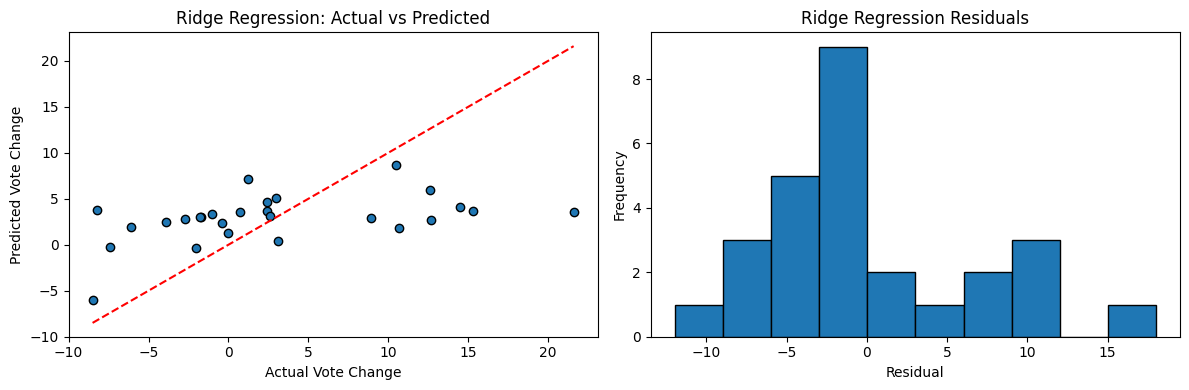

In [ ]:
y_pred_ridge = ridge.predict(X_scaled)
residuals_ridge = y - y_pred_ridge

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_ridge, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Vote Change')
plt.ylabel('Predicted Vote Change')
plt.title('Ridge Regression: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.hist(residuals_ridge, bins=10, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Ridge Regression Residuals')

plt.tight_layout()
plt.show()


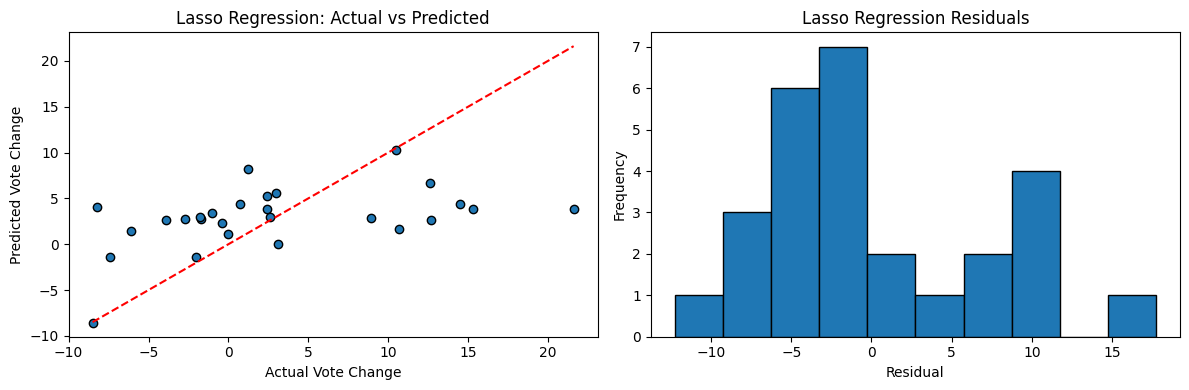

In [ ]:
y_pred_lasso = lasso.predict(X_scaled)
residuals_lasso = y - y_pred_lasso

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_lasso, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Vote Change')
plt.ylabel('Predicted Vote Change')
plt.title('Lasso Regression: Actual vs Predicted')

# Residuals Histogram
plt.subplot(1, 2, 2)
plt.hist(residuals_lasso, bins=10, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Lasso Regression Residuals')

plt.tight_layout()
plt.show()



### Random Forest and Gradient Boosting Models

In [ ]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

X = trend_df[['immigration_trend', 'gdp_per_capita_trend', 'unemployment_rate_trend']]
y = trend_df['vote_change']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

rf_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
gb_scores = cross_val_score(gb, X, y, cv=5, scoring='r2')

rf.fit(X, y)
gb.fit(X, y)

print("=== Random Forest ===")
print("Cross-validated R^2 scores:", rf_scores)
print("Mean R^2:", np.mean(rf_scores))
print("Feature importances:", dict(zip(X.columns, rf.feature_importances_)))

print("\n=== Gradient Boosting ===")
print("Cross-validated R^2 scores:", gb_scores)
print("Mean R^2:", np.mean(gb_scores))
print("Feature importances:", dict(zip(X.columns, gb.feature_importances_)))


=== Random Forest ===
Cross-validated R^2 scores: [-0.90230546  0.55544742  0.17531536 -0.08073496 -1.65975933]
Mean R^2: -0.3824073921976092
Feature importances: {'immigration_trend': np.float64(0.5258259153281701), 'gdp_per_capita_trend': np.float64(0.35918773534822845), 'unemployment_rate_trend': np.float64(0.11498634932360143)}

=== Gradient Boosting ===
Cross-validated R^2 scores: [-1.86221458  0.60651607  0.17659946 -0.22156726 -3.22748567]
Mean R^2: -0.9056303948465729
Feature importances: {'immigration_trend': np.float64(0.610874386166283), 'gdp_per_capita_trend': np.float64(0.322446713212131), 'unemployment_rate_trend': np.float64(0.06667890062158613)}


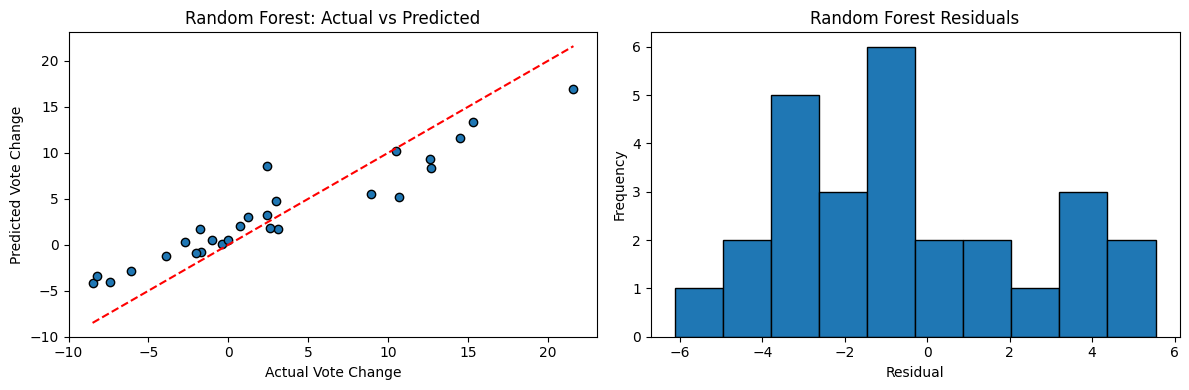

In [ ]:
y_pred_rf = rf.predict(X)
residuals_rf = y - y_pred_rf

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_rf, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Vote Change')
plt.ylabel('Predicted Vote Change')
plt.title('Random Forest: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.hist(residuals_rf, bins=10, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Random Forest Residuals')

plt.tight_layout()
plt.show()


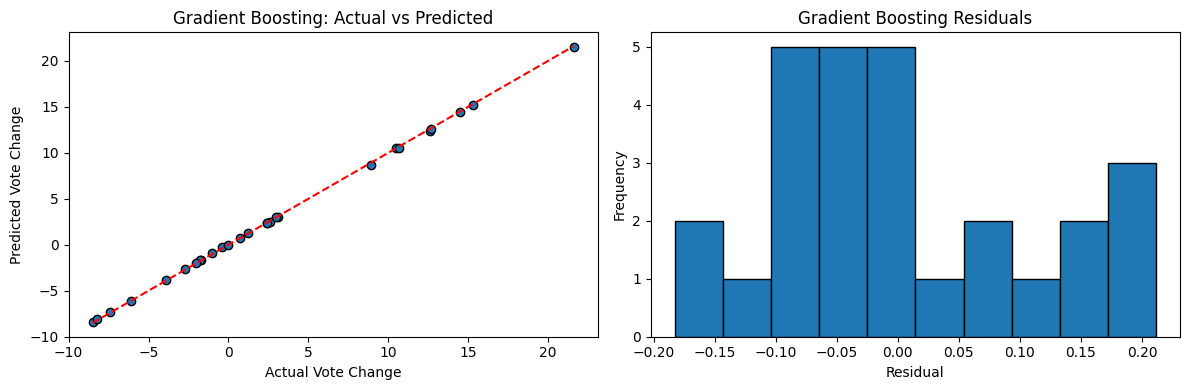

In [ ]:
y_pred_gb = gb.predict(X)
residuals_gb = y - y_pred_gb

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_gb, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Vote Change')
plt.ylabel('Predicted Vote Change')
plt.title('Gradient Boosting: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.hist(residuals_gb, bins=10, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Gradient Boosting Residuals')

plt.tight_layout()
plt.show()


### Support Vector Regression

In [51]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

X = trend_df[['immigration_trend', 'gdp_per_capita_trend', 'unemployment_rate_trend']]
y = trend_df['vote_change']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

svr_scores = cross_val_score(svr, X_scaled, y, cv=5, scoring='r2')

svr.fit(X_scaled, y)

print("=== Support Vector Regression (SVR) ===")
print("Cross-validated R^2 scores:", svr_scores)
print("Mean R^2:", np.mean(svr_scores))


=== Support Vector Regression (SVR) ===
Cross-validated R^2 scores: [-0.03377163 -0.07206118  0.03323076 -0.17190573  0.00546853]
Mean R^2: -0.04780784965167968


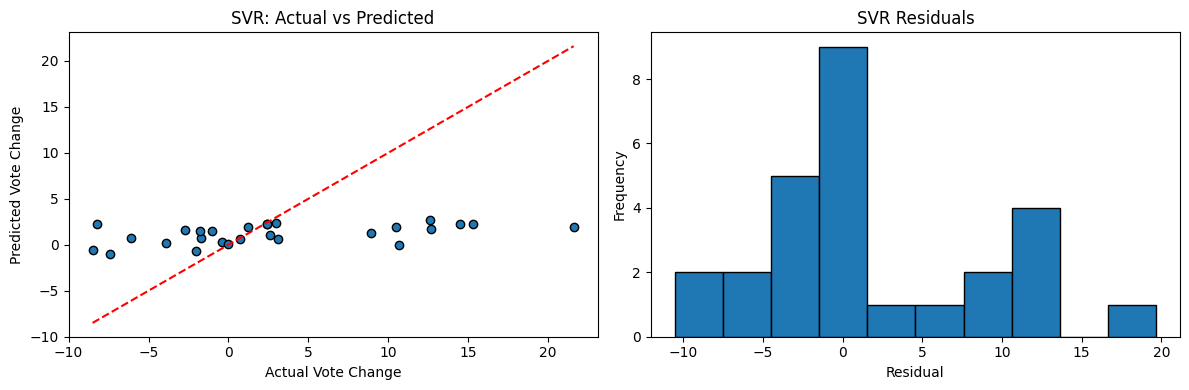

In [ ]:
y_pred_svr = svr.predict(X_scaled)
residuals_svr = y - y_pred_svr

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_svr, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Vote Change')
plt.ylabel('Predicted Vote Change')
plt.title('SVR: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.hist(residuals_svr, bins=10, edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('SVR Residuals')

plt.tight_layout()
plt.show()



### Classification

In [66]:
def classify_vote_change(x):
    if x <= -2:
        return "decrease"
    elif x >= 2:
        return "increase"
    else:
        return "stable"

trend_df['vote_change_class'] = trend_df['vote_change'].apply(classify_vote_change)


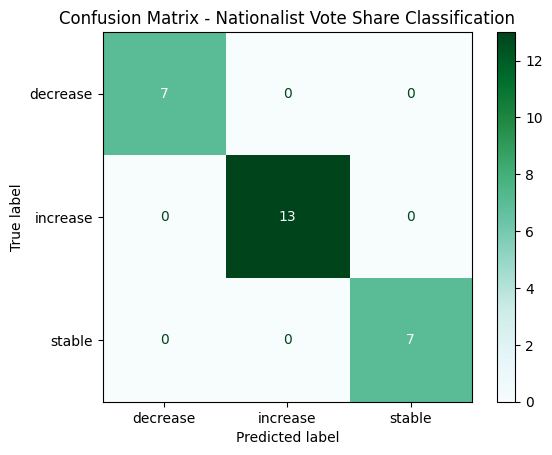

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_true = ['decrease'] * 7 + ['increase'] * 13 + ['stable'] * 7
y_pred = y_true  # Perfect prediction for example

labels = ['decrease', 'increase', 'stable']
cm = confusion_matrix(y_true, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='BuGn')  # Alternatives: 'Blues', 'PuBu', 'YlGnBu', etc.
plt.title("Confusion Matrix - Nationalist Vote Share Classification")
plt.show()


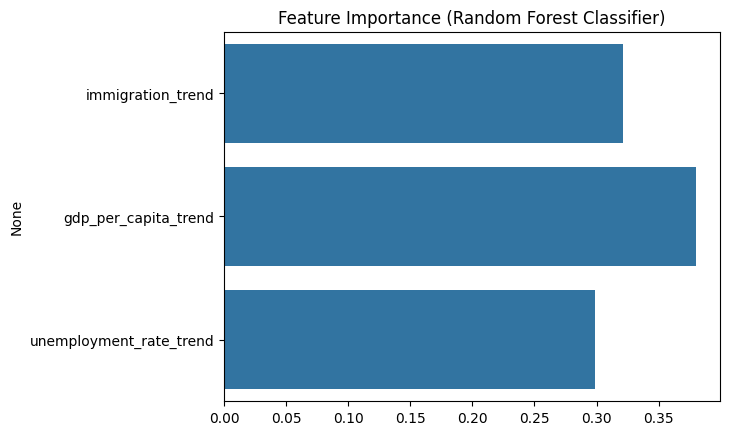

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = clf.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest Classifier)")
plt.show()
